In [14]:
from bing_image_downloader import downloader
# downloader.download("cricket bats",limit=20,output_dir="images",adult_filter_off=True)

In [15]:
# downloader.download("football",limit=20,output_dir="images",adult_filter_off=True)

In [16]:
# downloader.download("basketball",limit=20,output_dir="images",adult_filter_off=True)

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize

In [18]:
target = []
images = []
flat_data = []

DATADIR = 'C:/vs_code/ML/Project/ImageClassification/images'
CATEGORIES = ['basketball','cricket bats','ice cream cone']

In [19]:
for category in CATEGORIES:
    class_num = CATEGORIES.index(category) #label encoding values
    path = os.path.join(DATADIR,category) #create path to acess all images
    for img in os.listdir(path):
        img_array = io.imread(os.path.join(path,img))
       #print(img_array.shape) # gives(heigh,width,depth) of image
        # plt.imshow(img_array)  #to show only one image from dataset 
        # break
        img_resize = resize(img_array,(150,150,3))
        flat_data.append(img_resize.flatten())
        images.append(img_resize)
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

    

In [20]:
len(flat_data[0]) #150*150*3

67500

In [21]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<BarContainer object of 3 artists>

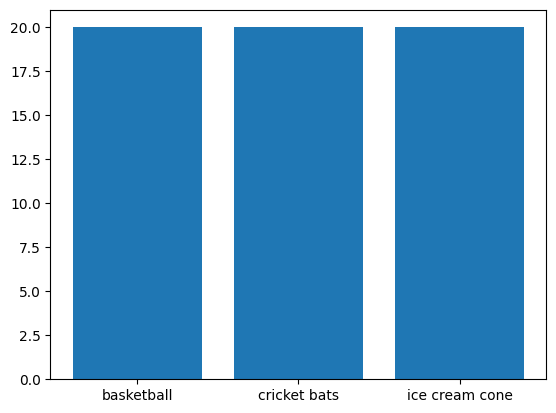

In [22]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count) # type: ignore

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [25]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 0])

In [26]:
y_test

array([1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0])

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.7777777777777778

In [28]:
confusion_matrix(y_pred,y_test)

array([[5, 0, 0],
       [0, 5, 0],
       [0, 4, 4]], dtype=int64)

In [29]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [30]:
model = pickle.load(open('img_model.p','rb'))

(265, 265, 3)
PREDICTED OUTPUT: cricket bats


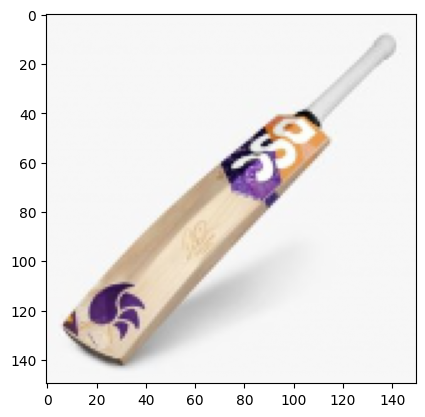

In [38]:
flat_data = []
url = input('enter ur url')
img = io.imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [ ]:
from pyngrok import ngrok
import streamlit as st
st.title('Image Classifier')